In [54]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
#Reading necessary data files
df= pd.read_csv("all3_ML_AvgPrecp.csv")

sono= pd.read_csv("Sonoma_ML_AvgPrecp.csv")
coast= pd.read_csv("Coast_ML_AvgPrecp.csv")
valley= pd.read_csv("Valley_ML_AvgPrecp.csv")

In [4]:
df.iloc[:20,0:2]

,Unnamed: 0,Rating
0,1996,89.000000
1,1997,87.900000
2,1998,87.666667
3,1999,87.258065
4,2000,87.888889
5,2001,87.972222
6,2002,86.671429
7,2003,87.055556
8,2004,86.980000
9,2005,87.432836


In [5]:
y =  df["Rating"]

In [6]:
X = df.iloc[:,2:] #Features start on column 2

In [7]:
imp = Imputer(missing_values='NaN', strategy='mean', axis=0) #Filling in NaNs with the mean of the column
imp.fit(X)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [8]:
fillX = imp.transform(X)

In [13]:
fillX.shape

(60, 24)

In [56]:
scaler = StandardScaler()
scaleX = scaler.fit_transform(fillX)

In [66]:
scaleX[:,0]

array([ 1.53947425,  1.93618331,  2.40709695,  0.18381378,  0.61191709,
       -0.05592407,  0.11817127, -0.16152289, -0.16152289,  0.17810574,
        0.08963105, -0.88359046,  2.12454877, -0.94923297,  1.3511088 ,
       -0.44977911,  0.600501  , -0.76942958, -0.99347031, -1.00916743,
        0.        ,  0.23518618,  0.72036992, -0.10729647, -0.46404922,
        1.37964902, -0.76942958, -1.00060536, -0.92640079,  1.9219132 ,
        1.21411574, -0.64670663,  3.71138502, -0.83221806,  1.93332929,
        0.        , -0.56679401, -0.51827564, -1.01202145, -0.78084567,
       -0.04878901, -0.32991019, -0.29851594, -0.61055569, -0.3536937 ,
       -0.64575529, -0.63624188, -0.08826965, -0.0730482 , -0.88359046,
       -0.23763014, -0.66668479, -0.52303234, -0.41267682, -0.44920831,
       -0.60746383, -0.44121705, -0.64156939, -0.64147426, -0.60889084])

In [67]:
svr_lin = SVR(kernel='linear', C=1)

In [68]:
y_lin = svr_lin.fit(scaleX, y)

In [69]:
y_predict = y_lin.predict(scaleX)

In [70]:
years = list(range(1996,2016))

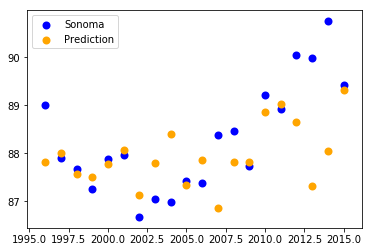

In [71]:
plt.close("all")


plt.scatter(years, df.iloc[:20,1], color="b", lw=2, label="Sonoma")
plt.scatter(years, y_predict[:20], color="orange", lw=2, label="Prediction")

plt.legend()
plt.show()

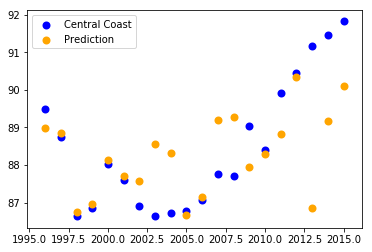

In [72]:
plt.close("all")


plt.scatter(years, df.iloc[20:40,1], color="b", lw=2, label="Central Coast")
plt.scatter(years, y_predict[20:40], color='orange', lw=2, label="Prediction")


plt.legend()
plt.show()

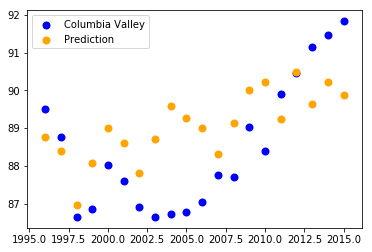

In [73]:
plt.close("all")


plt.scatter(years, df.iloc[20:40,1], color="b", lw=2, label="Columbia Valley")
plt.scatter(years, y_predict[40:60], color='orange', lw=2, label="Prediction")



plt.legend()
plt.show()